In [12]:
#Team:
# Tejas Morbagal Harish
# Saba Khan

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os, struct
from array import array as pyarray
from numpy import  array, zeros
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# method for reading the MNIST Dataset
def load_mnist(dataset="training", digits=np.arange(10), path="."):
    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols) )
    labels = zeros((N ) )
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels


In [3]:

# Read in training and test data
X_train, y_train = load_mnist('training')
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_train = np.divide(X_train, 256)
X_test, y_test = load_mnist('testing')
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_test = np.divide(X_test, 256)

# one hot encoding for train labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_train_y = onehot_encoder.fit_transform(integer_encoded)

# Starting values for weights W and bias b
np.random.seed(1)
b = np.zeros(10)
W = 2*np.random.random((X_train.shape[1],10)) - 1

In [4]:
def softmax(a):
    a = a - np.max(a)
    exp = np.exp(a)
    sum_exp = np.sum(exp)
    logits = np.divide(exp, sum_exp)
    return logits

In [5]:

def predict(X,W,b):
    return softmax(np.dot(X,W) + b)

In [6]:
#Computing gradients and loss
def l2loss(X,y,W,b):
    pred_y = predict(X, W, b)
    l2 = np.sum(np.square(y-pred_y))
    gradE_pred = y - pred_y
    gradE_h = gradE_pred*pred_y*(1-pred_y)
    gradE_W  = np.multiply(-2, np.dot(X.T, gradE_h))
    gradE_b = np.mean(-2*gradE_h, axis=0)
    return l2, gradE_W, gradE_b

In [7]:
#training the data for given iterations and learning rate
def train(X,y,W,b, num_iters=10, eta=0.001):
    """
    X: N-by-D array of training data
    y: N dimensional numpy array of labels
    W: D dimensional array of weights
    b: scalar bias
    num_iters: (optional) number of steps to take when optimizing
    eta: (optional)  the stepsize for the gradient descent

    Should return the final values of W and b
     """

    for i in range(num_iters):
        l, gradE_W, gradE_b = l2loss(X, y, W, b)
        # gradE_W = gradE_W.reshape((gradE_W.shape[0], 1))
        # gradE_b = gradE_b.reshape((gradE_b.shape[0], 1))
        W = np.subtract(W, eta*gradE_W)
        b = np.subtract(b, eta*gradE_b)
        loss[i] = loss[i] + l
        
    return W, b



In [8]:
# Training the data with batch size as 20
num_iters = 150
eta = 0.01
loss = np.zeros(num_iters)
batch_size = 20
start_index = 0
for i in range(int(len(X_train)/batch_size)):
    end_index = start_index + batch_size
    W,b = train(X_train[start_index: end_index], onehot_encoded_train_y[start_index: end_index], W, b, num_iters, eta)
    start_index = start_index + batch_size

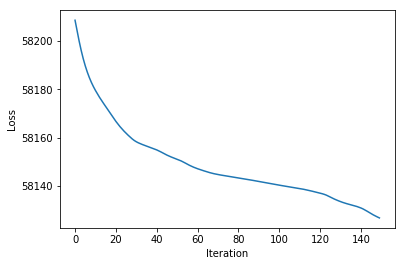

In [9]:
#Plot of loss vs iterations
%matplotlib inline
plt.plot(range(num_iters), loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [10]:
#prediction for test data
pred = predict(X_test, W, b)
# converting softmax predicted values to labels
yhat = np.argmax(pred, axis=1)


In [11]:
accuracy = np.mean(yhat==y_test)*100
print(accuracy)

15.02
